# Practica 1 : Ejercicio 1

Guillermo García Patiño Lenza

Entorno qiskit

In [2]:
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit import (
    QuantumCircuit,
    execute,
    Aer)


In [1]:
from qiskit import IBMQ
from qiskit import IBMQ
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import QasmSimulator
IBMQ.save_account("")
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2021-03-12 19:34:12,606: Credentials already present. Set overwrite=True to overwrite.
/home/feynman/anaconda3/envs/qiskitEnv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [3]:
simulator = Aer.get_backend('qasm_simulator')

#Circuito con 1 qbit y 1 registro de 1 bit
circuit = QuantumCircuit(1,1)
#Añadir puerta Hadamard que tiene el qbit 0 como entrada
circuit.h(0)
#Añadir puerta de medida de los qbits 0 sobre los bits de salida
circuit.measure([0],[0])
#ejecutar el circuito en el simulador
job = execute(circuit,simulator, shots = 1000)
#guardar el resultado
result = job.result()
#capturar los resultados de la salida
counts = result.get_counts(circuit)
print("\n Numero de ocurrencias para 0 y 1: ", counts)
circuit.draw()


 Numero de ocurrencias para 0 y 1:  {'0': 496, '1': 504}


┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

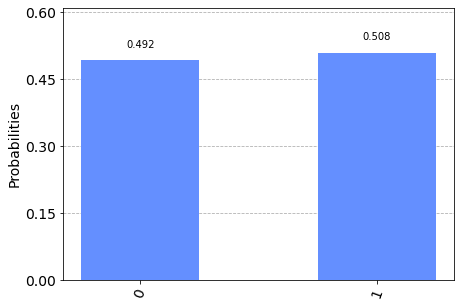

In [9]:
plot_histogram(counts)

### Comantario

   #### - Qiskit
   En este entorno, los circuitos cuánticos se inicializan con QuantumCircuit(x,y) donde x es el numero de qubits que empleará el circuito, e y es el número de bits clásicos que se emplean para expresar el resultado.
   
   Se le añaden puertas cuánticas empleando métodos del circuito que reciben como argumentos los qubits a los que se quiere aplicar la puerta. Por ejemplo, circuito.h(0) aplicaría una puerta Hadamard al qubit 0 del circuito, y circuito.cx(0,1) aplicaría una puerta CNOT al qubit 1 , empleando el 0 como qubit de control.
   
   Qiskit proporciona varios simuladores diferentes (Qasm_simulator, Statevector_simulator y Unitarity_simulator) que se comentarán en un ejercicio posterior, y permite emplear un modelo de ruido real de un computador cuántico en las simulaciones.
   
   Empleando el Qasm_simulator, se puede especificar la cantidad de veces que se quiere repetir la simulación empleando un parámetro en la funcion execute, lo que después se ve reflejado en el resultado de la simulacion obtenido mediante el método get_count() (que se puede transformar en una gráfica empleando la función plot_histogram() )
   
   Además, permite obtener una representación gráfica del circuito empleando el método draw() del circuito, que puede ser útil para entender como está configurado el circuito tras aplicar una serie de puertas.
   

#### -Forest

Para construir un circuito en Fotest hay que crear un objeto de la clase Program, especificando en su constructora las puertas cuánticas que se van a usar y sobre qué qubits están aplicadas. Por ejemplo Program(H(0)) crea un cicuito cuantico de un solo qubit al que se le aplica una puerta Hadamard.

Esta manera de crear los circuitos parece simple para trabajar a una escala pequeña, pero puede ser algo incómoda a la hora de construir circuitos más grandes.

Forest permite además elegir ciertas características del computador cuántico en el que se va a simular el circuito, como por ejemplo, el número de qubits o la topología del computador ( get_qc('9q-square-qvm') representa un computador cuantico cuadrado de 9 qubits ). 

Por otro lado, para simular el circuito hay que lanzar un servidor que toma el papel de simulador. Esto es algo incómodo, ya que si hay un error a la hora de lanzarlo y cerrarlo con 'with local_forest_runtime()', es necesario abrir un terminal aparte para lanzar el simulador.





#### -Cirq

En cirq los circuitos cuanticos se construyen como una sucesión de momentos, que son un conjunto de operaciones que se aplican a los qubits. Una vez construidos los momentos, se construye el circuito con cirq.Circuit((moment0, moment1,...)). También, una vez construidos los momentos, se pueden ir añadiendo al circuito uno a uno empleando el método append de los circuitos. Esto me parece bastante cómodo e intuitivo de emplear.

También en cirq se pueden obtener representaciones gráficas de los circuitos llamando a print() y pasándole como argumento la variable del circuito. Además, me parece que cirq es el entorno que genera representaciones gráficas más simples y menos intuitivas a primera vista.

Resulta bastante sencillo realizar una simulación del funcionamiento del circuito, aunque cirq no parece ofrecer, como si lo hacen otros entornos, una opción dentro del simulador para realizar varios shots, por lo que es necesario emplear un bucle si se quiere hacer esto.

#### -Tket

Tket es un entorno muy parecido a Qiskit. Permite construir circuitos y añadirles puertas cuánticas de una manera muy parecida a como se hacen en Qiskit, y para realizar las simulaciones se emplea uno de los simuladores que ofrece Qiskit en Aer.

Parece que no permite obtener un dibujo del circuito, como si lo hacen el resto de entornos de una manera o de otra.

Aún así, Tket permite realizar ciertas optimizaciones a los circuitos, como reducir el numero de puertas manteniendo su funcionamiento (con PauliSimp()) y ejecutar los programas en los backends reales que ofrece IBM.

#### -ProjectQ

ProjectQ es el entorno más extraño de todos en mi opinión. La forma de crear los circuitos es relativamente simple, aunque es poco intuitiva. Para hacerlo es necesario emplear un Engine que se encargará de compilar el circuito, que se compone construyendo qubits con allocate_qubit() y añadiendo puertas con el operador '|', lo que resulta bastante poco intuitivo.

Por otro lado, medir el resultado del circuito se hace de forma muy cómoda simplemente haciendo print() de un qubit, pero producir una representación gráfica del circuito en ProjectQ es mucho más complicado que en cualquier otro entorno, porque exclusivamente genera código LaTeX que es necesario compilar para ver la representación del circuito.

## Ejercicio 2

In [4]:
circuit2 = QuantumCircuit(2,2)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.measure([0,1],[0,1])
circuit2.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [5]:


provider = IBMQ.load_account()

backend = provider.get_backend('ibmq_lima')
noise_model = NoiseModel.from_backend(backend)


coupling_map = backend.configuration().coupling_map
basis_gates = noise_model.basis_gates

sim2 = Aer.get_backend('qasm_simulator')
sim3 = Aer.get_backend('statevector_simulator')
sim4 = Aer.get_backend('unitary_simulator')


ibmqfactory.load_account:WARNING:2021-03-12 19:35:04,215: Credentials are already in use. The existing account in the session will be replaced.


{'00': 503, '01': 30, '10': 67, '11': 424}


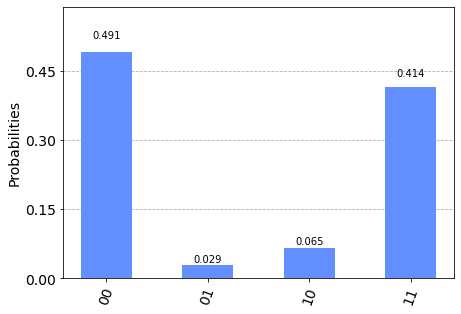

In [6]:

res2 = execute(circuit2, sim2,coupling_map = coupling_map, basis_gates = basis_gates, noise_model = noise_model).result()
counts2 = res2.get_counts()
print(counts2)
plot_histogram(counts2)

{'00': 1}


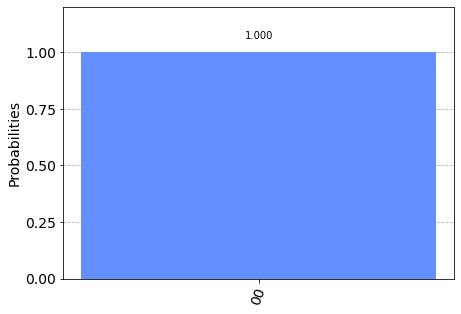

In [7]:
res3 = execute(circuit2, sim3,coupling_map = coupling_map, basis_gates = basis_gates).result()
counts3 = res3.get_counts()
print(counts3)
plot_histogram(counts3)

{'00': 1}


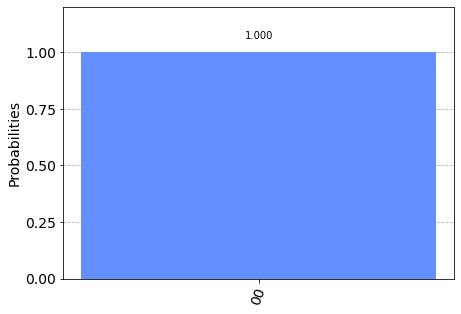

In [8]:
circuit3 = QuantumCircuit(2,2)
circuit3.h(0)
circuit3.cx(0,1)


res4 = execute(circuit3, sim4,coupling_map = coupling_map, basis_gates = basis_gates).result()
counts4 = res4.get_counts()
print(counts4)
plot_histogram(counts4)


### Comentario:

Los tres simuladores disponibles en Qiskit Aer son  el QasmSimulator, el StatevectorSimulator, UnitarySimulator.
El primero, QasmSimulator, permite realizar varias simulaciones (shots) ideales o empleando un modelo de ruido y devuelve las probabilidades de cada uno de los posibles resultados.
El segundo, StatevectorSimulator, solo permite realizar un solo shot, y devuelve el estado de los qubits en un vector.
El tercero, UnitaritySimulator, también permite solo un shot de una simulación ideal y devuelve una matriz que representa las transformaciones del circuito sobre los qubits

## Ejercicio 3: 

{'000': 491, '001': 9, '010': 5, '011': 19, '100': 8, '101': 12, '110': 14, '111': 466}


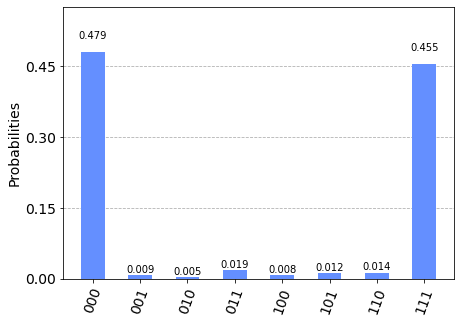

In [6]:
circuitoGHZ = QuantumCircuit(3,3)
#puerta Hadamard al qubit 0
circuitoGHZ.h(0)
# 1º es qubit de control y 2º qubit es objetivo
circuitoGHZ.cx(0,1)
# otra puerta CNOT con el qubit 1 de control y el 2 de objetivo
circuitoGHZ.cx(1,2)
circuitoGHZ.measure([0,1,2],[0,1,2])

resej3 = execute(circuitoGHZ, sim2,coupling_map = coupling_map, basis_gates = basis_gates, noise_model = noise_model).result()
countsej3 = resej3.get_counts()
print(countsej3)
plot_histogram(countsej3)


In [8]:
provider = IBMQ.load_account()
provider.backends()

/home/feynman/anaconda3/envs/qiskitEnv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

#### Ejecución sobre ibmq_athens

In [20]:
from qiskit import IBMQ
from qiskit import assemble, transpile

backend = provider.backends.ibmq_athens
qobj = assemble(transpile(circuitoGHZ, backend = backend), backend = backend)
job = backend.run(qobj)
retrieved_job = backend.retrieve_job(job.job_id())

{'000': 459, '001': 7, '010': 3, '011': 25, '100': 8, '101': 8, '110': 11, '111': 503}


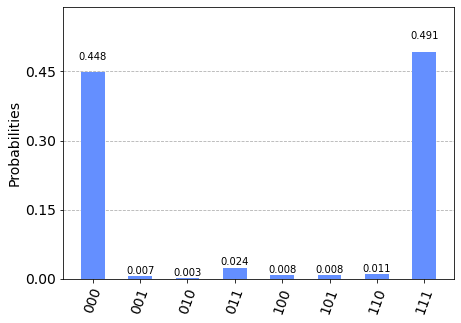

In [21]:
resultRealJob = retrieved_job.result()
countsReal = resultRealJob.get_counts()
print(countsReal)
plot_histogram(countsReal)

### Comentario

Como se espera, la ejecución en el backend real de IBM produce resultados diferentes a los que produce la simulación.

Los resultados ofrecidos por la simulación dan unas probabilidades mucho más parecidas a las que teorícamente deberían obtenerse al medir tres qubits en el estado GHZ (000 y 111 con igual probabilidad). No obstante, tanto en la simulación como en la ejecución real no se obtienen las anteriores probabilidaes, sino que el resto de estados aparecen con una probabilidad muy pequeña.

La diferencia entre la simulación del circuito y la ejecución en el backend real de IBM es que la probabilidad de los estados que no corresponden al resultado teórico es mayor en la ejecución en el backend que en la simulación, y en que las probabilidades de los estados 000 y 111 (que son los que teoricamente son correctos) difieren más con las que se obtienen teóricamente en la ejecución en el backend real que en la simulación.

Esta diferencia puede estar producida porque el computador cuántico donde se ha ejecutado el programa puede necesitar calibrarse, o a que el ruido y el retardo de las puertas cuánticas del computador real es mayor que el del modelo de ruido empleado en la simulación

## Ejercicio 4

In [11]:

provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

#### Ejecucion sobre ibmq_santiago

{'000': 567, '001': 14, '010': 8, '011': 20, '100': 7, '101': 12, '110': 32, '111': 364}


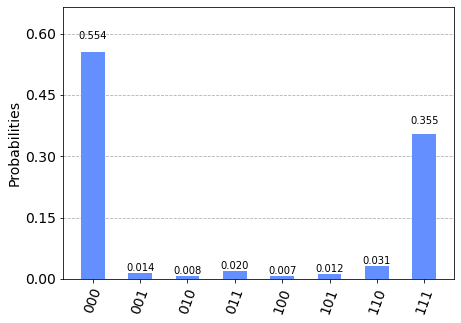

In [15]:
backend = provider.backends.ibmq_santiago
qobj = assemble(transpile(circuitoGHZ, backend = backend), backend = backend)
job = backend.run(qobj)
retrieved_job = backend.retrieve_job(job.job_id())

resultado_s = retrieved_job.result()
counts_s = resultado_s.get_counts()
print(counts_s)
plot_histogram(counts_s)

{'000': 478, '001': 17, '010': 10, '011': 36, '100': 20, '101': 15, '110': 43, '111': 405}


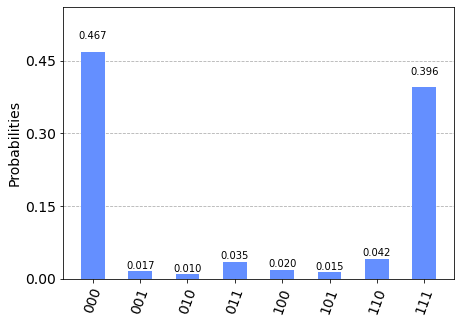

In [8]:
backend = provider.backends.ibmq_quito
qobj = assemble(transpile(circuitoGHZ, backend = backend), backend = backend)
job = backend.run(qobj)
retrieved_job = backend.retrieve_job(job.job_id())

resultado_q = retrieved_job.result()
counts_q = resultado_q.get_counts()
print(counts_q)
plot_histogram(counts_q)

#### Comentario:

En este apartado se ha ejecutado el circuito que pone 3 qubits en estado GHZ en 3 backends diferentes (ibmq_athens, ibmq_quito y ibmq_santiago), y se han graficado los resultados. Estos tres computadores tienen todos 5 qubits y un volumen cuántico de 32 en el caso de santiago y athens (que además tienen una topología lineal) , y 16 en el caso de quito (cuyos qubits están colocados en forma de T).  

Al observar los resultados, parece que la topología del computador ibmq_quito es peor para este problema, pues aunque produce probabilidades notablemente más altas para los estados que son correctos teóricamente que para el resto de estados, las probabilidades del estado 111 se alejan bastante de las que se deberían obtener. Por otro lado, este es el computador que produce unas probabilidades más altas para los estados incorrectos.

En el caso de ibmq_athens y ibmq_santiago, aún teniendo el mismo volumen cuántico y la misma topología, el ibmq_santiago produjo unos resultados visiblemente peores que los del ibmq_athens. Esto probablemente se deba a que, en el momento de la ejecución, el ibmq_santiago se encontrara en peores condiciones que el ibmq_athens, y necesitara ser calibrado
